## Solutions for the computational experiments in "Homework 2" of Abu-Mostafa's "Learning from Data" Machine Learning online course.

Copyright (C) 2020 Marcelo S. Reis.

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see http://www.gnu.org/licenses/.

### Exercises 1 and 2.

In [1]:
from random import randint
import statistics as stat

# This method receives the number of flips per coin and the number of coins.
# For each coin, it draws the given number of flips and counts the number of heads.
# It returns the fraction of heads of the first coin (index 0 in the coin array), the 
# fraction of heads of a random coin and also a minimum fraction of heads among all coins.
#
def run_experiment(number_of_coins, number_of_flips):

    coin = []
    
    for i in range(0, number_of_coins):
        coin.insert(0,0)
        
    cmin_value = 10
        
    for i in range(0, number_of_coins):
        
        frac_heads = 0
        
        for j in range(0, number_of_flips):    # N coin flips
            frac_heads += randint(0,1) / number_of_flips
        
        if (frac_heads < cmin_value):
            cmin_value = frac_heads
        
        coin[i] = frac_heads

    crand_index = randint(0, number_of_coins-1)   # we take a random coin index

    return (coin[0], coin[crand_index], cmin_value)


# This method receives a sample size N, a number of coins, a number of flips and 
# generates three samples of size N each, D_{c1}, D_{crand} and D_{cmin}, which
# correspond to observations of v1, vrand and vmin, respectively.
# Those samples are returned in three lists.
#
def generate_coins_samples(N, number_of_coins, number_of_flips):
    D_v1    = []
    D_vrand = []
    D_vmin  = []
        
    for _ in range(0,N):    
        (v1, vrand, vmin) = run_experiment(number_of_coins, number_of_flips)

        D_v1.insert(0,v1)
        D_vrand.insert(0,vrand)
        D_vmin.insert(0,vmin)
    
    return (D_v1, D_vrand, D_vmin)
    
    

number_of_flips = 10        # number of coin flips
number_of_coins = 1000      # number of coins
N               = 100      # number of experiments

(D_v1, D_vrand, D_vmin) = generate_coins_samples(N, number_of_coins, number_of_flips)


mean_vmin = stat.mean(D_vmin)
stddev_vmin = stat.stdev(D_vmin)

print('For ' + str(N) + ' executions the average of vmin is:')
print('mean vmin = %.2f' % mean_vmin)
print('dev vmin = %.2f' % stddev_vmin)
print('\n')

mean_v1 = stat.mean(D_v1)
stddev_v1 = stat.stdev(D_v1)

print('For ' + str(N) + ' executions the average of v1 is:')
print('mean v1 = %.2f' % mean_v1)
print('dev v1 = %.2f' % stddev_v1)
print('\n')

mean_vrand = stat.mean(D_vrand)
stddev_vrand = stat.stdev(D_vrand)

print('For ' + str(N) + ' executions the average of vrand is:')
print('mean rand = %.2f' % mean_vrand)
print('dev vrand = %.2f' % stddev_vrand)



For 100 executions the average of vmin is:
mean vmin = 0.04
dev vmin = 0.05


For 100 executions the average of v1 is:
mean v1 = 0.50
dev v1 = 0.17


For 100 executions the average of vrand is:
mean rand = 0.48
dev vrand = 0.17


In Exercise 2, it is asked to assess, for each coin, whether its distribution satifies the Hoeffding inequality, which is defined as:

$Pr(|\nu - \mu| > \epsilon) \le 2 e^{-2 \epsilon^2 N}$.

In [2]:
dist_min  = []
dist_v1   = []
dist_rand = []

# Once number_of_flips = 10, we can assess the distributions by simply creating a histogram,
# where the first position is the number of occurrences of v = 0, the second the number of
# occurrences of v = 0.1, and so forth, until the last position, which counts the number of 
# occurrences of v = 1.0.
#
for i in range(0, number_of_flips + 1):
    dist_min.insert(0,0)
    dist_v1.insert(0,0)
    dist_rand.insert(0,0)
    
for i in range(0, N):
    dist_min[int(D_vmin[i] * number_of_flips)] += 1
    dist_v1[int(D_v1[i] * number_of_flips)] += 1
    dist_rand[int(D_vrand[i] * number_of_flips)] += 1

print ('For all distributions:')
print ('# v = 0, # v = 0.1, # v = 0.2, ..., # v = 0.9, # v = 1.0')
print ('\n')
    
print ('vmin distribution:')
for i in range(0, number_of_flips + 1):
    print(dist_min[i], end=" ")
print('\n')
print ('v1 distribution:')
for i in range(0, number_of_flips + 1):
    print(dist_v1[i], end=" ")
print('\n')

print ('vrand distribution:')
for i in range(0, number_of_flips + 1):
    print(dist_rand[i], end=" ")
print('\n')



For all distributions:
# v = 0, # v = 0.1, # v = 0.2, ..., # v = 0.9, # v = 1.0


vmin distribution:
62 38 0 0 0 0 0 0 0 0 0 

v1 distribution:
0 2 5 9 25 20 19 19 0 1 0 

vrand distribution:
1 2 3 14 24 25 14 15 0 2 0 



### Exercises 5 and 6.

We start here repeating the assistant methods that we used for PLA in the previous Homework.

In [3]:
from random import randint
from random import random


# An assistant method for draw of a point in [-1,1]x[-1,1].
#
def draw_point():
    return (random() * (-1) ** randint(0,1), random() * (-1) ** randint(0,1))

# This method returns parameter values for a target function f(x1,x2) = a1 x1 + a2 x2 + b.
#
def generate_target_function():
    point_1 = draw_point()
    point_2 = draw_point()    
    a = (point_1[1] - point_2[1]) / (point_1[0] - point_2[0])
    b = point_1[1] - a * point_1[0]
    return (a, b)

# This method receives a sample size N and parameter values of a target function f. 
# It returns N pairs of observations ((x1,x2),y), where x1 and x2 are values in 
# [-1,1] and y is a value in {-1, +1} defined according whether its corresponding
# (x1,x2) coordinates fall above or below the target function line. 
#
def generate_data(N, a, b):
    D = []
    for _ in range(0,N):
        (x1, x2) = draw_point()
        y = +1
        if ( x2 <  (a * x1 + b)):
            y = -1
        D.insert(0,(x1, x2, y))
    return D

Let us test the two methods defined above:

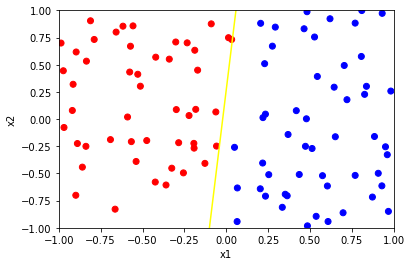

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# This method receives a sample D, parameter values of a function and
# plots a graph in which each point is painted according to its location
# in respect to the function.
#
def plot_sample(D, a, b):
    label_color = []               # +1 and -1 must be painted with 'r' and 'b', respectively.
    for i in range(0,len(D)):
        if D[i][2] == 1:
            label_color.append('r')
        else:
            label_color.append('b')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.scatter(list(zip(*D))[0],list(zip(*D))[1],c=label_color)
    plt.plot(np.linspace(-1, 1, 10), a * np.linspace(-1, 1, 10) + b, c= "yellow")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

(a, b) = generate_target_function()

D = generate_data(100, a, b)

plot_sample(D, a, b)


Now, we implement a Linear Regression Algorithm (LRA) for problems with dimension $d = 2$:

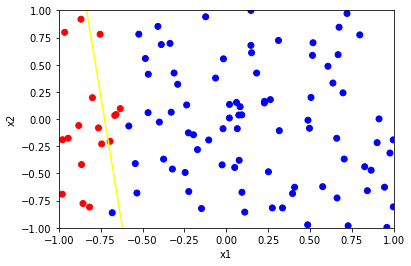

In [5]:
# LRA receives a sample D with N points and returns the estimated weights w0, w1 and w2.
#
def LRA (D):
    N = len(D)
    X = []
    for i in range(0, N):
        point = [1]                          # first position of the row is x0
        for j in range(0,len(D[i])-1):       # last position of D[i] is the label, thus we skip it
            point.insert(len(point),D[i][j])
        
        X.insert(0, point)
    
    X_pinv = np.linalg.pinv(X)
    
    y = []
    for i in range(0, N):
        y.insert(0, D[i][-1])  # -1 in Python is the index of the last position of the row, which here is y

    w = np.matmul(X_pinv,y)
    
    return (w)

# A single run to see if everything is ok:
#
(a, b) = generate_target_function()
D  = generate_data(100, a, b)

(w0, w1, w2) = LRA(D)

plot_sample(D, -w1/w2, -w0/w2)

Now we use LRA for linear classification and assess the in-sample and the out-of-sample errors.

In [6]:
import statistics as stat

# Method that receives the number of runs k and the sample size N of each run.
# For each run, it generates a target function f, draws N samples using it and estimates an 
# approximation g of f by applying the sample into LRA. It returns, for each run, the in-sample 
# and the out-of-sample error of that run.
#
def run_LRA_experiment(k, N):
    
    Ein  = []  # in-sample error of the i-th experiment.

    Eout = []  # out-of-sample error of the i-th experiment.
    
    test_sample_size = 1000

    for _ in range(0, k):

        (a, b) = generate_target_function()

        D  = generate_data(N, a, b)

        (w0,w1,w2) = LRA(D)    
    
        # First, we compute the Ein of this iteration:
        #
        misclassified = 0
        
        for i in range(0, len(D)):
            x1 = D[i][0]
            x2 = D[i][1]
            dot_prod = w2 * x2 + w1 * x1 + w0
            if ((dot_prod > 0) and (D[i][2] < 0)) or ((dot_prod < 0) and (D[i][2] > 0)):
                misclassified += 1

        Ein.append(misclassified / N)
        
        # Now we generate a test sample and compute the Eout:
        #
        test_sample = generate_data(test_sample_size, a, b) # test sample for estimation of Eout

        misclassified = 0

        for i in range(0, test_sample_size):
            x1 = test_sample[i][0]
            x2 = test_sample[i][1]
            dot_prod = w2 * x2 + w1 * x1 + w0
            if ((dot_prod > 0) and (test_sample[i][2] < 0)) or ((dot_prod < 0) and (test_sample[i][2] > 0)):
                misclassified += 1
            
        Eout.append(misclassified / test_sample_size)

    return (Ein, Eout)


(Ein, Eout) = run_LRA_experiment(1000, 100)

mean   = stat.mean(Ein)
stddev = stat.stdev(Ein)

print('For N = 100, on average, Ein(g):')
print('Mean = %.4f' % mean)
print('Deviation = %.4f' % stddev)

mean   = stat.mean(Eout)
stddev = stat.stdev(Eout)

print('For N = 100, on average, Eout(g):')
print('Mean = %.4f' % mean)
print('Deviation = %.4f' % stddev)


For N = 100, on average, Ein(g):
Mean = 0.0413
Deviation = 0.0309
For N = 100, on average, Eout(g):
Mean = 0.0503
Deviation = 0.0321


### Exercise 7.

In [7]:
# PLA receives a sample D with N points and returns the estimated weights w0, w1 and w2.
# It also returns the number n of iterations required to finish the procedure.
# This version uses LRA for weights initialization.
#
def PLA (D):
    N = len(D)
    n = 0
    (w0, w1, w2) = LRA(D)
    misclassified = True
    while (misclassified == True):
        misclassified = False
        for i in range(0,N):
            x1 = D[i][0]
            x2 = D[i][1]
            y  = D[i][2]
            dot_prod = w2 * x2 + w1 * x1 + w0
            if not ( ((y == 1) and (dot_prod > 0)) or ((y == -1) and (dot_prod < 0)) ):
                w2 = w2 + y * x2
                w1 = w1 + y * x1
                w0 = w0 + y * 1
                misclassified = True
                n += 1
    return (w0, w1, w2, n)

import statistics as stat

iterations = []

N = 10       # number of points in a sample.

k = 100      # number of runs.

for _ in range(0, k):
    (a, b) = generate_target_function()
    D = generate_data(N, a, b)
    (w0, w1, w2,n) = PLA(D)
    iterations.insert(0,n)

mean = stat.mean(iterations)
stddev = stat.stdev(iterations)

print('For ' + str(k) + ' runs the average number of iterations is:')
print('Mean = %.2f' % mean)
print('Deviation = %.2f' % stddev)

For 100 runs the average number of iterations is:
Mean = 4.31
Deviation = 13.36


### Exercises 8, 9 and 10.

In these exercises, we play with nonlinear transformations. We start with **Exercise 8**, where we try to use LRA to classify nonlinear, noisy data:

In [9]:
from random import random

# Generates and returns N nonlinear data points with stochastic noise.
#
def generate_noisy_nonlinear_data(N):
    D = []
    for _ in range(0,N):
        (x1, x2) = draw_point()
        y  = 1
        if ((x1 ** 2 + x2 ** 2 - 0.6) < 0):
            y = -1
        if(random() <= 0.1):   # we flip the point sign 10% of the time
            if y == 1:
                y = -1
            else:
                y = 1
        D.insert(0,(x1, x2, y))
    return D

Ein = []

N = 1000

k = 100

for _ in range(0,k):
    D = generate_noisy_nonlinear_data(N)

    (w0, w1, w2) = LRA(D)
    
    misclassified = 0

    for i in range(0,N):
        x1 = D[i][0]
        x2 = D[i][1]
        y  = D[i][2]
                
        dot_prod = w2 * x2 + w1 * w1 + w0
        
        if (((y == 1) and (dot_prod < 0)) or ((y == -1) and (dot_prod > 0))):
          misclassified += 1/N
   
    Ein.insert(0, misclassified)

mean = stat.mean(Ein)
stddev = stat.stdev(Ein)

print('For ' + str(k) + ' executions the average Ein(g) is:')
print('Mean = %.4f' % mean)
print('Deviation = %.4f' % stddev)

For 100 executions the average Ein(g) is:
Mean = 0.5079
Deviation = 0.0491


### Exercise 9.

Given the high in-sample error of the previous exercise, we will now apply a nonlinear transformation in our data.

In [10]:
# This method receives a dataset with features (1, x1, x2) and transforms each feature into a feature vector:
# 
#  (1, x1, x2, x1 * x2, x1^2, x^2)
#
# The yielded dataset, Dz, is then returned.
#
def nonlinear_transformation(D):
    Dz = []    
    #
    # Observe that x0 is added within the previous LRA code, and the last element of the tuple is the label.
    #
    for i in range(0, len(D)):
        Dz.insert(0,(D[i][0], D[i][1], D[i][0] * D[i][1], D[i][0] ** 2, D[i][1] ** 2, D[i][2]))
    
    return(Dz)

k = 1000   # number of runs.

N = 1000

avg_w = [0, 0, 0, 0, 0, 0]
    
for _ in range(0,k):
    D = generate_noisy_nonlinear_data(N)
    Dz = nonlinear_transformation(D)
    w = LRA(Dz)
    for i in range(0,6):
        avg_w[i] += w[i] / k

print ('Estimated function:')
print ('(%.3f) + (%.3f)x1 + (%.3f)x2 + (%.3f)x1x2 + (%.3f)x1^2 + (%.3f)x2^2' % (avg_w[0], avg_w[1], avg_w[2], avg_w[3], avg_w[4], avg_w[5]))

Estimated function:
(-0.993) + (-0.000)x1 + (-0.004)x2 + (-0.001)x1x2 + (1.557)x1^2 + (1.558)x2^2


### Exercise 10.

Finally, let's try to classify using our fancy nonlinear transformation:

In [11]:
Eout = []

N = 1000

k = 100

for _ in range(0,k):
    D = generate_noisy_nonlinear_data(N)
    Dz = nonlinear_transformation(D)
    w = LRA(Dz)

    misclassified = 0
    
    for i in range(0,N):
        
        dot_prod = w[0] + w[1] * D[i][0] + w[2] * D[i][1] + w[3] * D[i][0] * D[i][1] + w[4] * D[i][0]**2 + w[5] * D[i][1]**2 
        
        y = D[i][2]
        
        if (((y == 1) and (dot_prod < 0)) or ((y == -1) and (dot_prod > 0))):
          misclassified += 1 / N
   
    Eout.insert(0, misclassified)

mean = stat.mean(Eout)
stddev = stat.stdev(Eout)

print('For ' + str(k) + ' executions the average Eout(g) is:')
print('Mean = %.4f' % mean)
print('Deviation = %.4f' % stddev)

For 100 executions the average Eout(g) is:
Mean = 0.1235
Deviation = 0.0136
